# Pyber Observational Trends
* Pyber data shows that just over 80% of all drivers are in urban settings, providing more than 68% of all rides.
* The high demand of ride sharing in urban settings means the average fare price is lower than in suburban and rural areas.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and read files
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df, how='left', on='city')
      
# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
#Create variables for each of the three city types
urban_cities = combined_df[combined_df['type'] == 'Urban']
suburban_cities = combined_df[combined_df['type'] == 'Suburban']
rural_cities = combined_df[combined_df['type'] == 'Rural']

#Calculate the number of cities within each city type
urban_ct = urban_cities.groupby(['city']).count()['ride_id']
suburban_ct = suburban_cities.groupby(['city']).count()['ride_id']
rural_ct = rural_cities.groupby(['city']).count()['ride_id']

#Calculate the average driver count by city type
urban_driver = urban_cities.groupby(['city']).mean()['driver_count']
suburban_driver = suburban_cities.groupby(['city']).mean()['driver_count']
rural_driver = rural_cities.groupby(['city']).mean()['driver_count']

#Calculate the average fare by city type
urban_fare = urban_cities.groupby(['city']).mean()['fare']
suburban_fare = suburban_cities.groupby(['city']).mean()['fare']
rural_fare = rural_cities.groupby(['city']).mean()['fare']

### Bubble Plot

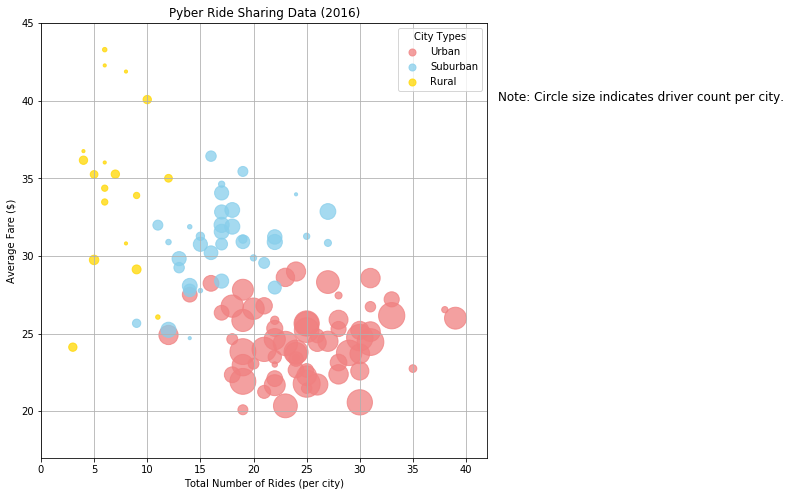

In [8]:
#Create a scatter plot for each city type
plt.figure(figsize=(8,8))

plt.scatter(urban_ct,
           urban_fare,
           s=urban_driver*10, c="lightcoral",
           edgecolor="lightcoral", linewidths=1, marker="o",
           alpha=0.75, label="Urban")

plt.scatter(suburban_ct,
           suburban_fare,
           s=suburban_driver*10, c="skyblue",
           edgecolor="skyblue", linewidths=1, marker="o",
           alpha=0.75, label="Suburban")

plt.scatter(rural_ct,
           rural_fare,
           s=rural_driver*10, c="gold",
           edgecolor="gold", linewidths=1, marker="o",
           alpha=0.75, label="Rural")

#Add plot title, axes labels, x- and y-limits
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.xlim(0, 42)
plt.ylim(17, 45)

# Add legend, special note, and formatting
plt.legend(loc='best')
plt.text(43, 40, 'Note: Circle size indicates driver count per city.', fontsize=12)

lgnd = plt.legend(fontsize="medium", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types",
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

#Save figure
plt.savefig('avt_Pyber_bubbleplot.png')

#Show figure
plt.show()

## Total Fares by City Type

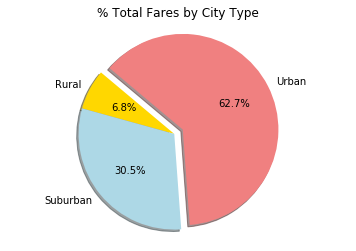

In [5]:
# Calculate sum of total fares by city type
tot_fares = combined_df.groupby('type')['fare'].sum()

# Build pie chart; remember, "explode" creates spacing between each wedge
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightblue', 'lightcoral']
explode = (0, 0, 0.1)

plt.pie(tot_fares, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('% Total Fares by City Type')

# Save figure
plt.savefig('avt_Pyber_percentfares.png')

# Show plot
plt.show()

## Total Rides by City Type

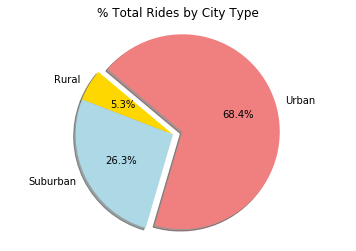

In [6]:
# Calculate Ride Percents
tot_rides = combined_df.groupby('type')['ride_id'].count()

# Build pie chart; remember, "explode" creates spacing between each wedge
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightblue', 'lightcoral']
explode = (0, 0, 0.1)

plt.pie(tot_rides, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('% Total Rides by City Type')

# Save figure
plt.savefig('avt_Pyber_percentrides.png')

# Show plot
plt.show()

## Total Drivers by City Type

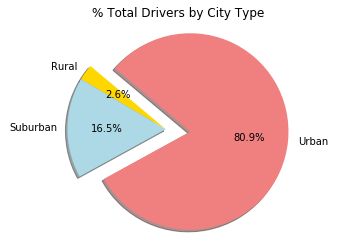

In [7]:
# Calculate Driver Percents
tot_drivers = city_df.groupby('type')['driver_count'].sum()

# Build pie chart; remember, "explode" creates spacing between each wedge
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightblue', 'lightcoral']
explode = (0, 0, 0.25)

plt.pie(tot_drivers, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('% Total Drivers by City Type')

# Save figure
plt.savefig('avt_Pyber_percentdrivers.png')

# Show plot
plt.show()
